# CPHASE: conditional phase vs. gate time 

In [10]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import constants
from typing import List, Dict, Callable
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import copy
import json

In [11]:
with open("cphase_data/gate_time_phase_result.txt") as my_file:
    result = json.load(my_file)

In [102]:
cond_phase = []
eps_drive = []
freq_drive = []
t_gate = []
for res in result:
    cond_phase.append(res["cond_phase"])
    eps_drive.append(res["eps_drive"]*1e3)
    freq_drive.append(res["freq_drive"])
    t_gate.append(res["t_gate"])

In [150]:
def plot_gate_time_phase(
    cond_phase: List,
    t_gate: List,
    eps_drive: List,
    plot_setup={'fs': 20, 'lw': 2.0, 'lw_levels': 3.0, 'ls': 16, 'fsl':16},
    save=False
):
    cond_phase = [phase for phase in cond_phase if phase <= 2*np.pi]
    t_gate = t_gate[0: len(cond_phase)]
    eps_drive = eps_drive[0: len(cond_phase)]
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.plot(cond_phase, t_gate, linewidth=plot_setup["lw"], color='black')
    ax1.set_xlabel('$\phi$', fontsize=plot_setup["fs"])
    ax1.set_ylabel('$t_{\\mathrm{gate}} \, (\mathrm{ns})$', fontsize=plot_setup["fs"])
    x_ticks = [np.pi, 3*np.pi/2, 2*np.pi]
    ax1.set_xticks(x_ticks)
    x_ticks_latex = ['$\pi$', '$3\pi/2$', '$2 \pi$']
    ax1.set_xticklabels(x_ticks_latex)
    #plt.xticks(x_ticks, x_ticks_latex)
    y_ticks = [80 + 10*y for y in range(0, 8)]
    ax1.set_yticks(y_ticks)
    y_ticks_latex = ['$' + str(y) + '$' for y in y_ticks ]
    ax1.set_yticklabels(y_ticks_latex)
    ax1.tick_params(axis='both', labelsize=plot_setup["ls"])
    ax2 = ax1.twinx()
    ax2.plot(cond_phase, eps_drive, linewidth=plot_setup["lw"], color='blue')
    y_ticks_2 = [2 + 2*y for y in range(0, 10)]
    ax2.set_yticks(y_ticks_2)
    y_ticks_latex_2 = ['$2$', '$4$', '$6$', '$8$', '$10$', 
                       '$12$', '$14$', '$16$', '$18$', '$20$']
    ax2.set_yticklabels(y_ticks_latex_2)
    ax2.tick_params(axis='y', labelsize=plot_setup["ls"])
    ax2.set_ylabel("$\\varepsilon_{\\mathrm{drive}} \, (\mathrm{MHz})$", 
                   fontsize=plot_setup["fs"], rotation=-90, labelpad=30)
    plt.savefig("phase_gate_time.svg")
    plt.show()

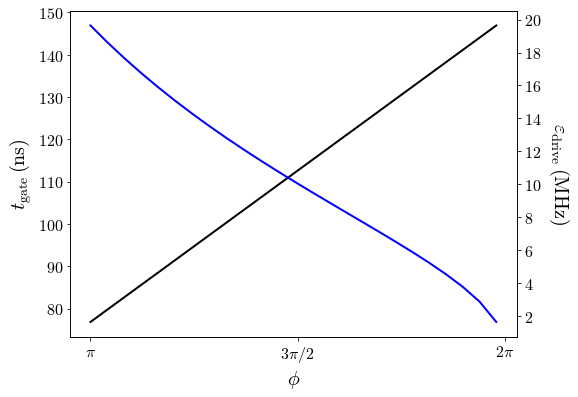

In [151]:
plot_gate_time_phase(cond_phase, t_gate, eps_drive)

In [23]:
pippo = [phase for phase in cond_phase if phase < 2*np.pi]

In [80]:
pippo = 2.34445

In [87]:
str(pippo)[:2]

'2.'